In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rc
import seaborn as sns
import backward as bk
import forward as fw
import math

In [2]:
#誤差項を初期時刻には含めない
def backward_normal_rand(N, theta, u, d, p, default_value, mu, sigma):
    pi = ((((p*(u-1))/((1-p)*(1-d)))**theta)-1)/((u - 1)+(((p*(u-1))/((1-p)*(1-d)))**theta)*(1 - d))
    up_times = bk.up_times(N)
    down_times = bk.down_times(N)
    prm_theta = bk.prm_theta(N, theta)
    
    up_r_norm_rand = bk.up_norm_rand(N, u, seed, mu, sigma)
    down_r_norm_rand = bk.down_norm_rand(N, d, seed, mu, sigma)
    
    prob = bk.prob(N, p)
    prm_M = bk.prm_M(N, pi, prm_theta, up_r_norm_rand, down_r_norm_rand, prob)
    value = bk.value(N, pi, default_value, up_r_norm_rand, down_r_norm_rand)
    wealth = bk.wealth(N, prm_theta, prm_M, value)
    utility = bk.utility(N, prm_theta, value)
    exp_utility = bk.exp_utility(N, up_times, down_times, prob, utility)
    Wn = bk.Wn(N, up_times, down_times, prob, wealth)
    
    df_backward = pd.DataFrame([up_times, down_times, prm_theta, up_r_norm_rand, down_r_norm_rand, prob, prm_M, value, wealth, utility, exp_utility, Wn]).T
    df_backward.columns = ['up_times', 'down_times', 'prm_theta', 'up_r', 'down_r', 'prob', 'prm_M', 'value', 'wealth', 'utility', 'exp_utility', 'Wn']
    
    return df_backward#df_backward['exp_utility'][N], df_backward['wealth'][0] 

In [163]:
#誤差項を決め打ちで入力する
def backward_normal_rand_input(N, theta, u, d, p, default_value, up_eps, down_eps):
    pi = ((((p*(u-1))/((1-p)*(1-d)))**theta)-1)/((u - 1)+(((p*(u-1))/((1-p)*(1-d)))**theta)*(1 - d))
    up_times = bk.up_times(N)
    down_times = bk.down_times(N)
    prm_theta = bk.prm_theta(N, theta)
    
    up_r = bk.up_r(N, u)
    #up_r_norm_rand = list(map(lambda x,y: list(map(lambda a,b: a+b, x,y)), up_r, bk.norm_rand(N, seed, mu, sigma)))
    up_r_norm_rand = list(map(lambda x,y: list(map(lambda a,b: a+b, x,y)), up_r, [[0], [up_eps, up_eps]]))
    
    down_r = bk.down_r(N, d)
    #down_r_norm_rand = list(map(lambda x,y: list(map(lambda a,b: a+b, x,y)), down_r, bk.norm_rand(N, seed, mu, sigma)))
    down_r_norm_rand = list(map(lambda x,y: list(map(lambda a,b: a-b, x,y)), down_r, [[0], [down_eps, down_eps]]))
    
    prob = bk.prob(N, p)
    prm_M = bk.prm_M(N, pi, prm_theta, up_r_norm_rand, down_r_norm_rand, prob)
    value = bk.value(N, pi, default_value, up_r_norm_rand, down_r_norm_rand)
    wealth = bk.wealth(N, prm_theta, prm_M, value)
    utility = bk.utility(N, prm_theta, value)
    exp_utility = bk.exp_utility(N, up_times, down_times, prob, utility)
    Wn = bk.Wn(N, up_times, down_times, prob, wealth)
    
    df_backward = pd.DataFrame([up_times, down_times, prm_theta, up_r_norm_rand, down_r_norm_rand, prob, prm_M, value, wealth, utility, exp_utility, Wn]).T
    df_backward.columns = ['up_times', 'down_times', 'prm_theta', 'up_r', 'down_r', 'prob', 'prm_M', 'value', 'wealth', 'utility', 'exp_utility', 'Wn']
    
    return df_backward#df_backward['exp_utility'][N], df_backward['wealth'][0] 

In [4]:
#誤差項を初期時刻には含めない
def forward_normal_rand(N, theta, u, d, p, default_value, mu, sigma):
    up_times = fw.up_times(N)
    down_times = fw.down_times(N)
    prm_theta = fw.prm_theta(N, theta)
    
    up_r_norm_rand = fw.up_norm_rand(N, u, seed, mu, sigma)
    down_r_norm_rand = fw.down_norm_rand(N, d, seed, mu, sigma)
    
    prob = fw.prob(N, p)
    prm_q = fw.prm_q(N, up_r_norm_rand, down_r_norm_rand)
    prm_a = fw.prm_a(N, prob, prm_q)
    prm_b = fw.prm_b(N, prm_q)
    prm_c = fw.prm_c(N, prob, prm_q)
    delta = fw.delta(N, prm_theta, prm_a, prm_b, prm_c)
    pi = fw.pi(N, prm_theta, up_r_norm_rand, prob, prm_q, delta)
    value = fw.value(N, default_value, up_r_norm_rand, down_r_norm_rand, pi)
    U0 = fw.U0(N, prm_theta, value)
    I0 = fw.I0(N, prm_theta, value)
    I1 = fw.I1(N, delta, I0)
    U1 = fw.U1(N, prm_theta, delta, U0)
    exp_U1 = fw.exp_U1(N, up_times, down_times, prob, U1)
    
    df_forward = pd.DataFrame([up_times, down_times, prm_theta, up_r_norm_rand, down_r_norm_rand, prob, prm_q, prm_a, prm_b, prm_c, delta, pi, value, U0, I0, I1, U1, exp_U1]).T
    df_forward.columns = ['up_times', 'down_times', 'prm_theta', 'up_r', 'down_r', 'prob', 'prm_q', 'prm_a', 'prm_b', 'prm_c', 'delta', 'pi', 'value', 'U0', 'I0', 'I1', 'U1', 'exp_U1']
    
    return df_forward#df_forward["exp_U1"][N]

In [164]:
#誤差項を決め打ちで入力する
def forward_normal_rand_input(N, theta, u, d, p, default_value, up_eps, down_eps):
    up_times = fw.up_times(N)
    down_times = fw.down_times(N)
    prm_theta = fw.prm_theta(N, theta)
    
    up_r = fw.up_r(N, u)
    #up_r_norm_rand = list(map(lambda x,y: list(map(lambda a,b: a+b, x,y)), up_r, fw.norm_rand(N, seed, mu, sigma)))
    up_r_norm_rand = list(map(lambda x,y: list(map(lambda a,b: a+b, x,y)), up_r, [[0], [up_eps, up_eps]]))
    
    down_r = fw.down_r(N, d)
    #down_r_norm_rand = list(map(lambda x,y: list(map(lambda a,b: a+b, x,y)), down_r, fw.norm_rand(N, seed, mu, sigma)))
    down_r_norm_rand = list(map(lambda x,y: list(map(lambda a,b: a-b, x,y)), down_r, [[0], [down_eps, down_eps]]))
    
    prob = fw.prob(N, p)
    prm_q = fw.prm_q(N, up_r_norm_rand, down_r_norm_rand)
    prm_a = fw.prm_a(N, prob, prm_q)
    prm_b = fw.prm_b(N, prm_q)
    prm_c = fw.prm_c(N, prob, prm_q)
    delta = fw.delta(N, prm_theta, prm_a, prm_b, prm_c)
    pi = fw.pi(N, prm_theta, up_r_norm_rand, prob, prm_q, delta)
    value = fw.value(N, default_value, up_r_norm_rand, down_r_norm_rand, pi)
    U0 = fw.U0(N, prm_theta, value)
    I0 = fw.I0(N, prm_theta, value)
    I1 = fw.I1(N, delta, I0)
    U1 = fw.U1(N, prm_theta, delta, U0)
    exp_U1 = fw.exp_U1(N, up_times, down_times, prob, U1)
    
    df_forward = pd.DataFrame([up_times, down_times, prm_theta, up_r_norm_rand, down_r_norm_rand, prob, prm_q, prm_a, prm_b, prm_c, delta, pi, value, U0, I0, I1, U1, exp_U1]).T
    df_forward.columns = ['up_times', 'down_times', 'prm_theta', 'up_r', 'down_r', 'prob', 'prm_q', 'prm_a', 'prm_b', 'prm_c', 'delta', 'pi', 'value', 'U0', 'I0', 'I1', 'U1', 'exp_U1']
    
    return df_forward#df_forward["exp_U1"][N]

In [6]:
def default_plot_normal(N, theta, u, d, p, default_value, mu, sigma):
    default_arr = []
    
    for i in range(1, 11):
        default_arr.append(500*i)
        forward_backward_diff = [list(map(lambda x: x, default_arr)), list(map(lambda x: sum(forward_normal_rand(N, theta, u, d, p, x, mu, sigma)["exp_U1"][N]) - sum(backward_normal_rand(N, theta, u, d, p, x, mu, sigma)["exp_utility"][N]), default_arr))]

    diff = pd.DataFrame(forward_backward_diff).T
    diff.columns = ["default", "Exp_diff"]

    diff_x = diff["default"]
    diff_y = diff["Exp_diff"]
    
    sns.set()
    sns.set_style('white')
    plt.figure(figsize=(20,10))
    plt.plot(diff_x, diff_y, label = "FW-DP-diff")

    plt.title(r"$\theta =$" +str(theta), fontsize=32)
    plt.xlabel(r"$x_0$", fontsize=32)
    plt.ylabel(r"$E[u(V_T^*)]$", fontsize=32)

    plt.tick_params(labelsize=24)
    plt.legend(fontsize=32)
    return plt.show()

In [5]:
def default_plot_y_normal(N, theta, u, d, p, default_value, mu, sigma):
    default_arr = []

    for i in range(1, 11):
        default_arr.append(500*i)
        forward_backward_diff = [list(map(lambda x: x, default_arr)), list(map(lambda x: math.pow(sum(forward_normal_rand(N, theta, u, d, p, x, mu, sigma)["exp_U1"][N])*(1-1/theta), 1/(1-(1/theta))) - math.pow(sum(backward_normal_rand(N, theta, u, d, p, x, mu, sigma)["exp_utility"][N])*(1-1/theta), 1/(1-(1/theta))), default_arr))]

    diff = pd.DataFrame(forward_backward_diff).T
    diff.columns = ["default", "Exp_diff"]

    diff_x = diff["default"]
    diff_y = diff["Exp_diff"]

    plt.figure(figsize=(20,10))
    plt.plot(diff_x, diff_y, label = "FW-DP-diff")

    plt.title(r"$\theta =$" +str(theta), fontsize=32)
    plt.xlabel(r"$x_0$", fontsize=32)
    plt.ylabel(r"$y$", fontsize=32)

    plt.tick_params(labelsize=24)
    plt.legend(fontsize=32)
    return plt.show()

In [6]:
def default_plot_normal_N(N, theta, u, d, p, default_value, mu, sigma):
    N_arr = []
    
    for i in range(1, 11):
        N_arr.append(i)
        forward_backward_diff_theta_12 = [list(map(lambda x: x, N_arr)), list(map(lambda x: sum(forward_normal_rand(x, 1.2, u, d, p, default_value, mu, sigma)["exp_U1"][x]) - sum(backward_normal_rand(x, 1.2, u, d, p, default_value, mu, sigma)["exp_utility"][x]), N_arr))]

    diff_theta_12 = pd.DataFrame(forward_backward_diff_theta_12).T
    diff_theta_12.columns = ["default", "Exp_diff"]

    diff_x_theta_12 = diff_theta_12["default"]
    diff_y_theta_12 = diff_theta_12["Exp_diff"]
    
    for i in range(1, 11):
        forward_backward_diff_theta_20 = [list(map(lambda x: x, N_arr)), list(map(lambda x: sum(forward_normal_rand(x, 2.0, u, d, p, default_value, mu, sigma)["exp_U1"][x]) - sum(backward_normal_rand(x, 2.0, u, d, p, default_value, mu, sigma)["exp_utility"][x]), N_arr))]

    diff_theta_20 = pd.DataFrame(forward_backward_diff_theta_20).T
    diff_theta_20.columns = ["default", "Exp_diff"]

    diff_x_theta_20 = diff_theta_20["default"]
    diff_y_theta_20 = diff_theta_20["Exp_diff"]
    
    for i in range(1, 11):
        forward_backward_diff_theta_30 = [list(map(lambda x: x, N_arr)), list(map(lambda x: sum(forward_normal_rand(x, 3.0, u, d, p, default_value, mu, sigma)["exp_U1"][x]) - sum(backward_normal_rand(x, 3.0, u, d, p, default_value, mu, sigma)["exp_utility"][x]), N_arr))]

    diff_theta_30 = pd.DataFrame(forward_backward_diff_theta_30).T
    diff_theta_30.columns = ["default", "Exp_diff"]

    diff_x_theta_30 = diff_theta_30["default"]
    diff_y_theta_30 = diff_theta_30["Exp_diff"]
       
    sns.set()
    sns.set_style('white')
    plt.figure(figsize=(20,10))
    plt.plot(diff_x_theta_12, diff_y_theta_12, label = r"$\theta$ = 1.2")
    plt.plot(diff_x_theta_20, diff_y_theta_20, label = r"$\theta$ = 2.0")
    plt.plot(diff_x_theta_30, diff_y_theta_30, label = r"$\theta$ = 3.0")

    plt.title(r"$s =$" +str(sigma), fontsize=32)
    plt.xlabel(r"$N$", fontsize=32)  
    plt.ylabel(r"$E[u(V_T^*)]$-diff", fontsize=32)
    plt.grid()

    plt.tick_params(labelsize=24)
    plt.legend(fontsize=32)
    return plt.show()

In [31]:
def default_plot_normal_sigma(N, theta, u, d, p, default_value, mu, sigma):
    sigma_arr = []
    
    for i in range(1, 101):
        sigma_arr.append(0.01*i)
        forward_backward_diff_theta_12 = [list(map(lambda x: x, sigma_arr)), list(map(lambda x: sum(forward_normal_rand(N, 1.2, u, d, p, default_value, mu, x)["exp_U1"][N]) - sum(backward_normal_rand(N, 1.2, u, d, p, default_value, mu, x)["exp_utility"][N]), sigma_arr))]

    diff_theta_12 = pd.DataFrame(forward_backward_diff_theta_12).T
    diff_theta_12.columns = ["default", "Exp_diff"]

    diff_x_theta_12 = diff_theta_12["default"]
    diff_y_theta_12 = diff_theta_12["Exp_diff"]
    
    for i in range(1, 101):
        forward_backward_diff_theta_20 = [list(map(lambda x: x, sigma_arr)), list(map(lambda x: sum(forward_normal_rand(N, 2.0, u, d, p, default_value, mu, x)["exp_U1"][N]) - sum(backward_normal_rand(N, 2.0, u, d, p, default_value, mu, x)["exp_utility"][N]), sigma_arr))]

    diff_theta_20 = pd.DataFrame(forward_backward_diff_theta_20).T
    diff_theta_20.columns = ["default", "Exp_diff"]

    diff_x_theta_20 = diff_theta_20["default"]
    diff_y_theta_20 = diff_theta_20["Exp_diff"]
    
    for i in range(1, 101):
        forward_backward_diff_theta_30 = [list(map(lambda x: x, sigma_arr)), list(map(lambda x: sum(forward_normal_rand(N, 3.0, u, d, p, default_value, mu, x)["exp_U1"][N]) - sum(backward_normal_rand(N, 3.0, u, d, p, default_value, mu, x)["exp_utility"][N]), sigma_arr))]

    diff_theta_30 = pd.DataFrame(forward_backward_diff_theta_30).T
    diff_theta_30.columns = ["default", "Exp_diff"]

    diff_x_theta_30 = diff_theta_30["default"]
    diff_y_theta_30 = diff_theta_30["Exp_diff"]
    
    sns.set()
    sns.set_style('white')
    plt.figure(figsize=(20,10))
    plt.plot(diff_x_theta_12, diff_y_theta_12, label = r"$\theta$ = 1.2")
    plt.plot(diff_x_theta_20, diff_y_theta_20, label = r"$\theta$ = 2.0")
    plt.plot(diff_x_theta_30, diff_y_theta_30, label = r"$\theta$ = 3.0")

    plt.title("forward-backward,$u=$"+str(u)+"$,d=$"+str(d)+"$,\mu =0$"+"$,x_0=$"+str(default_value), fontsize=32)
    plt.xlabel(r"$s$", fontsize=32)  
    plt.ylabel(r"$E[u(V_T^*)]$-diff", fontsize=32)
    plt.grid()

    plt.tick_params(labelsize=24)
    plt.legend(fontsize=32)
    return plt.show()

In [165]:
def default_plot_normal_sigma_input(N, theta, u, d, p, default_value):
    eps_arr = []
    
    for i in range(0, 101):
        eps_arr.append(0.001*i)
        forward_backward_diff_theta_12 = [list(map(lambda x: x, eps_arr)), list(map(lambda x: sum(forward_normal_rand_input(N, 1.2, u, d, p, default_value, x, x)["exp_U1"][N]) - sum(backward_normal_rand_input(N, 1.2, u, d, p, default_value, x, x)["exp_utility"][N]), eps_arr))]

    diff_theta_12 = pd.DataFrame(forward_backward_diff_theta_12).T
    diff_theta_12.columns = ["default", "Exp_diff"]

    diff_x_theta_12 = diff_theta_12["default"]
    diff_y_theta_12 = diff_theta_12["Exp_diff"]
    
    for i in range(0, 101):
        forward_backward_diff_theta_20 = [list(map(lambda x: x, eps_arr)), list(map(lambda x: sum(forward_normal_rand_input(N, 2.0, u, d, p, default_value, x, x)["exp_U1"][N]) - sum(backward_normal_rand_input(N, 2.0, u, d, p, default_value, x, x)["exp_utility"][N]), eps_arr))]

    diff_theta_20 = pd.DataFrame(forward_backward_diff_theta_20).T
    diff_theta_20.columns = ["default", "Exp_diff"]

    diff_x_theta_20 = diff_theta_20["default"]
    diff_y_theta_20 = diff_theta_20["Exp_diff"]
    
    for i in range(0, 101):
        forward_backward_diff_theta_30 = [list(map(lambda x: x, eps_arr)), list(map(lambda x: sum(forward_normal_rand_input(N, 3.0, u, d, p, default_value, x, x)["exp_U1"][N]) - sum(backward_normal_rand_input(N, 3.0, u, d, p, default_value, x, x)["exp_utility"][N]), eps_arr))]

    diff_theta_30 = pd.DataFrame(forward_backward_diff_theta_30).T
    diff_theta_30.columns = ["default", "Exp_diff"]

    diff_x_theta_30 = diff_theta_30["default"]
    diff_y_theta_30 = diff_theta_30["Exp_diff"]
    
    sns.set()
    sns.set_style('white')
    plt.figure(figsize=(20,10))
    plt.plot(diff_x_theta_12, diff_y_theta_12, label = r"$\theta$ = 1.2")
    plt.plot(diff_x_theta_20, diff_y_theta_20, label = r"$\theta$ = 2.0")
    plt.plot(diff_x_theta_30, diff_y_theta_30, label = r"$\theta$ = 3.0")

    plt.title("forward-backward,$u=$"+str(u)+"$,d=$"+str(d)+"$,\mu =0$"+"$,x_0=$"+str(default_value), fontsize=32)
    plt.xlabel(r"$\epsilon$", fontsize=32)  
    plt.ylabel(r"$E[u(V_T^*)]$-diff", fontsize=32)
    plt.grid()

    plt.tick_params(labelsize=24)
    plt.legend(fontsize=32)
    return plt.show()

## 2期間目だけに誤差項（正規乱数）を入れたもの

### seed 12345

In [21]:
seed = 12345
N = 1
theta = 1.2
u = 1.2
d = 0.8
p = 0.4
default_value = 500
mu = 0
sigma=0.01

In [18]:
backward_normal_rand(N, theta, u, d, p, default_value, mu, sigma)

,up_times,down_times,prm_theta,up_r,down_r,prob,prm_M,value,wealth,utility,exp_utility,Wn
0,[0],[0],[1.2],[1.2],[0.8],[0.4],[1.004017865334002],[500.0],[16.971531130541546],[16.903614683087046],[16.903614683087046],[16.971531130541546]
1,"[1, 0]","[0, 1]","[1.2, 1.2]","[1.200418340291473, 1.2059509116615656]","[0.800418340291473, 0.8059509116615656]","[0.4, 0.4]","[1.0039343360168274, 1.0028261743700213]","[380.45518874347766, 615.7457027444775]","[16.151089941930945, 17.500541306329605]","[16.151089941930945, 17.500541306329605]","[6.460435976772378, 10.500324783797764]","[6.460435976772378, 10.500324783797764]"


In [19]:
forward_normal_rand(N, theta, u, d, p, default_value, mu, sigma)

,up_times,down_times,prm_theta,up_r,down_r,prob,prm_q,prm_a,prm_b,prm_c,delta,pi,value,U0,I0,I1,U1,exp_U1
0,[0],[0],[1.2],[1.2],[0.8],[0.4],[0.5],[1.4999999999999998],[1.0],[1.2],[0.9951997797372921],[-1.192952811430986],[500.0],[16.903614683087046],[177.47683298777858],[176.62490509790942],[16.835970022768272],[16.835970022768272]
1,"[1, 0]","[0, 1]","[1.2, 1.2]","[1.200418340291473, 1.2059509116615656]","[0.800418340291473, 0.8059509116615656]","[0.4, 0.4]","[0.4989541492713176, 0.48512272084608593]","[1.4937379938752429, 1.4133155816564975]","[1.0041921716863553, 1.0613340852309168]","[1.1974951975500971, 1.165326232662599]","[0.9952986001587888, 0.9965092821360707]","[-1.1805266391304725, -1.0169717380268588]","[381.7004051578, 598.6712193150325]","[16.15988827557967, 17.418709666034626]","[141.72142727048953, 206.21661332896664]","[141.0551381748238, 205.49676931298023]","[16.096551678816212, 17.368025072315014]","[6.438620671526485, 10.420815043389007]"


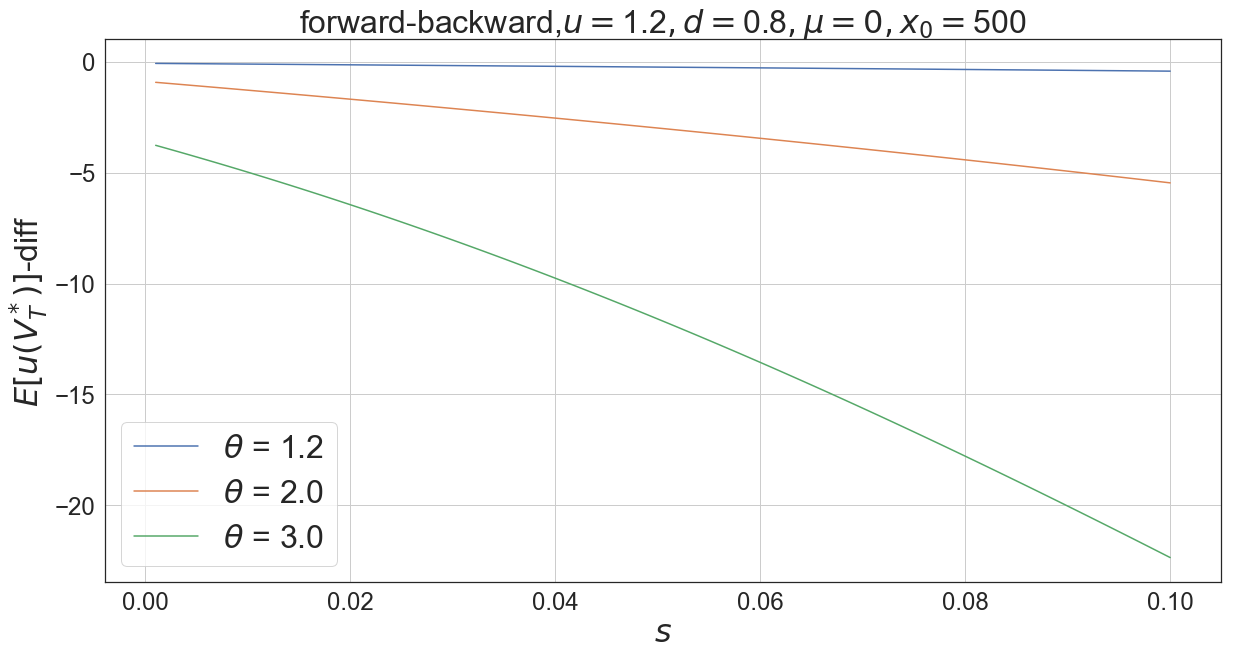

In [20]:
default_plot_normal_sigma(N, theta, u, d, p, default_value, mu, sigma)

### seed 928

In [22]:
seed = 928
N = 1
theta = 1.2
u = 1.2
d = 0.8
p = 0.4
default_value = 500
mu = 0
sigma=0.01

In [23]:
backward_normal_rand(N, theta, u, d, p, default_value, mu, sigma)

,up_times,down_times,prm_theta,up_r,down_r,prob,prm_M,value,wealth,utility,exp_utility,Wn
0,[0],[0],[1.2],[1.2],[0.8],[0.4],[1.004017865334002],[500.0],[16.971531130541546],[16.903614683087046],[16.903614683087046],[16.971531130541546]
1,"[1, 0]","[0, 1]","[1.2, 1.2]","[1.198012930600877, 1.2036934074757615]","[0.7980129306008773, 0.8036934074757616]","[0.4, 0.4]","[1.0044141179524217, 1.0032791317507563]","[381.8899588699975, 617.0922507271137]","[16.16122550810447, 17.506914033101523]","[16.16122550810447, 17.506914033101523]","[6.4644902032417875, 10.504148419860913]","[6.4644902032417875, 10.504148419860913]"


In [24]:
forward_normal_rand(N, theta, u, d, p, default_value, mu, sigma)

,up_times,down_times,prm_theta,up_r,down_r,prob,prm_q,prm_a,prm_b,prm_c,delta,pi,value,U0,I0,I1,U1,exp_U1
0,[0],[0],[1.2],[1.2],[0.8],[0.4],[0.5],[1.4999999999999998],[1.0],[1.2],[0.9951997797372921],[-1.192952811430986],[500.0],[16.903614683087046],[177.47683298777858],[176.62490509790942],[16.835970022768272],[16.835970022768272]
1,"[1, 0]","[0, 1]","[1.2, 1.2]","[1.198012930600877, 1.2036934074757615]","[0.7980129306008773, 0.8036934074757616]","[0.4, 0.4]","[0.504967673497807, 0.4907664813105962]","[1.5301051460592945, 1.445603431330476]","[0.9803247860862183, 1.0376289703597752]","[1.212042058423718, 1.1782413725321903]","[0.9947163847584143, 0.9960368615262464]","[-1.2521187729266874, -1.0835540928694545]","[376.03214615620624, 606.3544058934474]","[16.119642751790945, 17.45576982715246]","[139.96543916499436, 208.41970714471603]","[139.22591563732695, 207.59371098464234]","[16.04863644523925, 17.398101064109387]","[6.4194545780957, 10.438860638465632]"


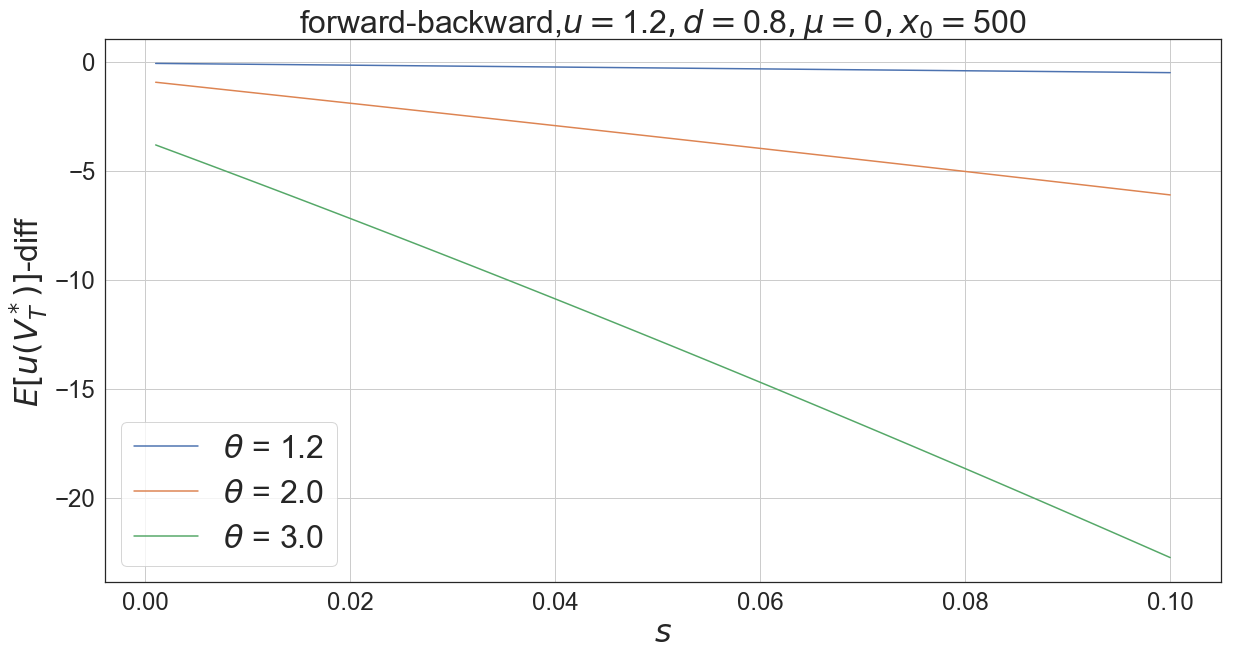

In [25]:
default_plot_normal_sigma(N, theta, u, d, p, default_value, mu, sigma)

### seed 2018

In [26]:
seed = 2018
N = 1
theta = 1.2
u = 1.2
d = 0.8
p = 0.4
default_value = 500
mu = 0
sigma=0.01

In [27]:
backward_normal_rand(N, theta, u, d, p, default_value, mu, sigma)

,up_times,down_times,prm_theta,up_r,down_r,prob,prm_M,value,wealth,utility,exp_utility,Wn
0,[0],[0],[1.2],[1.2],[0.8],[0.4],[1.004017865334002],[500.0],[16.971531130541546],[16.903614683087046],[16.903614683087046],[16.971531130541546]
1,"[1, 0]","[0, 1]","[1.2, 1.2]","[1.2046958592870476, 1.2122589190892132]","[0.8046958592870476, 0.8122589190892133]","[0.4, 0.4]","[1.003078128546356, 1.001554714699357]","[377.9037495876176, 611.9831251468075]","[16.132987001484146, 17.482672613254316]","[16.132987001484146, 17.482672613254316]","[6.453194800593659, 10.489603567952589]","[6.453194800593659, 10.489603567952589]"


In [28]:
forward_normal_rand(N, theta, u, d, p, default_value, mu, sigma)

,up_times,down_times,prm_theta,up_r,down_r,prob,prm_q,prm_a,prm_b,prm_c,delta,pi,value,U0,I0,I1,U1,exp_U1
0,[0],[0],[1.2],[1.2],[0.8],[0.4],[0.5],[1.4999999999999998],[1.0],[1.2],[0.9951997797372921],[-1.192952811430986],[500.0],[16.903614683087046],[177.47683298777858],[176.62490509790942],[16.835970022768272],[16.835970022768272]
1,"[1, 0]","[0, 1]","[1.2, 1.2]","[1.2046958592870476, 1.2122589190892132]","[0.8046958592870476, 0.8122589190892133]","[0.4, 0.4]","[0.4882603517823811, 0.4693527022769668]","[1.4311780027685488, 1.3267363396297025]","[1.0480876572294417, 1.1305938905831552]","[1.1724712011074196, 1.1306945358518812]","[0.9962503106315342, 0.9976718809370764]","[-1.0539658775477752, -0.8315590241194348]","[392.1287745180655, 578.0588950146508]","[16.23264791996052, 17.31729007810756]","[144.94077976121815, 200.28268594244906]","[144.39729686029037, 199.8164040033329]","[16.181909224459382, 17.283686293039167]","[6.472763689783753, 10.3702117758235]"


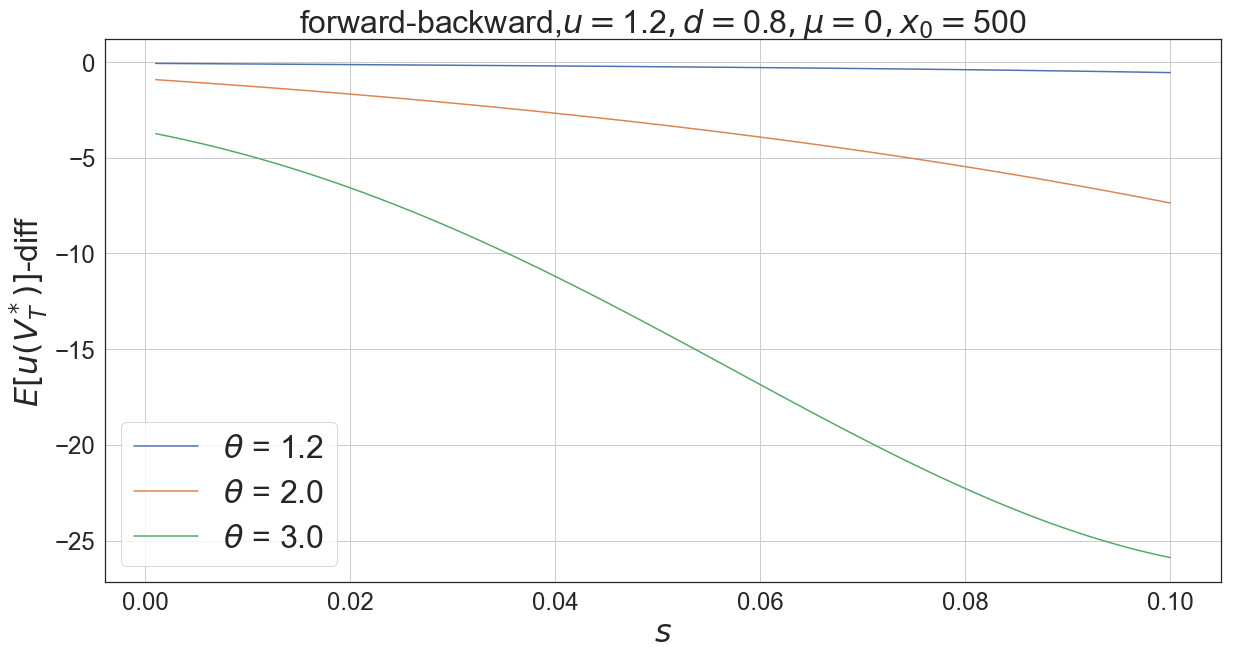

In [29]:
default_plot_normal_sigma(N, theta, u, d, p, default_value, mu, sigma)

## backwardが勝つので標準偏差$\sigma$を大きくしてみる

### $0\le\sigma\le $

### seed 12345

In [32]:
seed = 12345
N = 1
theta = 1.2
u = 1.2
d = 0.8
p = 0.4
default_value = 500
mu = 0
sigma=0.01

In [33]:
backward_normal_rand(N, theta, u, d, p, default_value, mu, sigma)

,up_times,down_times,prm_theta,up_r,down_r,prob,prm_M,value,wealth,utility,exp_utility,Wn
0,[0],[0],[1.2],[1.2],[0.8],[0.4],[1.004017865334002],[500.0],[16.971531130541546],[16.903614683087046],[16.903614683087046],[16.971531130541546]
1,"[1, 0]","[0, 1]","[1.2, 1.2]","[1.200418340291473, 1.2059509116615656]","[0.800418340291473, 0.8059509116615656]","[0.4, 0.4]","[1.0039343360168274, 1.0028261743700213]","[380.45518874347766, 615.7457027444775]","[16.151089941930945, 17.500541306329605]","[16.151089941930945, 17.500541306329605]","[6.460435976772378, 10.500324783797764]","[6.460435976772378, 10.500324783797764]"


In [34]:
forward_normal_rand(N, theta, u, d, p, default_value, mu, sigma)

,up_times,down_times,prm_theta,up_r,down_r,prob,prm_q,prm_a,prm_b,prm_c,delta,pi,value,U0,I0,I1,U1,exp_U1
0,[0],[0],[1.2],[1.2],[0.8],[0.4],[0.5],[1.4999999999999998],[1.0],[1.2],[0.9951997797372921],[-1.192952811430986],[500.0],[16.903614683087046],[177.47683298777858],[176.62490509790942],[16.835970022768272],[16.835970022768272]
1,"[1, 0]","[0, 1]","[1.2, 1.2]","[1.200418340291473, 1.2059509116615656]","[0.800418340291473, 0.8059509116615656]","[0.4, 0.4]","[0.4989541492713176, 0.48512272084608593]","[1.4937379938752429, 1.4133155816564975]","[1.0041921716863553, 1.0613340852309168]","[1.1974951975500971, 1.165326232662599]","[0.9952986001587888, 0.9965092821360707]","[-1.1805266391304725, -1.0169717380268588]","[381.7004051578, 598.6712193150325]","[16.15988827557967, 17.418709666034626]","[141.72142727048953, 206.21661332896664]","[141.0551381748238, 205.49676931298023]","[16.096551678816212, 17.368025072315014]","[6.438620671526485, 10.420815043389007]"


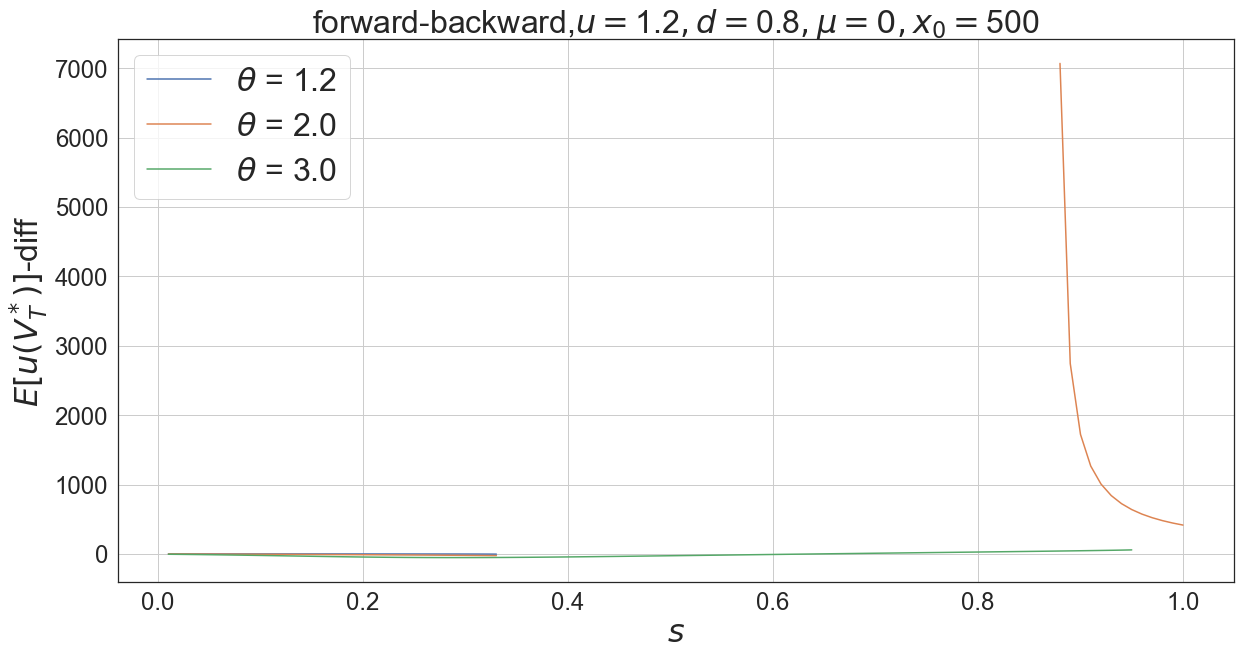

In [35]:
default_plot_normal_sigma(N, theta, u, d, p, default_value, mu, sigma)

### seed 928

In [36]:
seed = 928
N = 1
theta = 1.2
u = 1.2
d = 0.8
p = 0.4
default_value = 500
mu = 0
sigma=0.01

In [37]:
backward_normal_rand(N, theta, u, d, p, default_value, mu, sigma)

,up_times,down_times,prm_theta,up_r,down_r,prob,prm_M,value,wealth,utility,exp_utility,Wn
0,[0],[0],[1.2],[1.2],[0.8],[0.4],[1.004017865334002],[500.0],[16.971531130541546],[16.903614683087046],[16.903614683087046],[16.971531130541546]
1,"[1, 0]","[0, 1]","[1.2, 1.2]","[1.198012930600877, 1.2036934074757615]","[0.7980129306008773, 0.8036934074757616]","[0.4, 0.4]","[1.0044141179524217, 1.0032791317507563]","[381.8899588699975, 617.0922507271137]","[16.16122550810447, 17.506914033101523]","[16.16122550810447, 17.506914033101523]","[6.4644902032417875, 10.504148419860913]","[6.4644902032417875, 10.504148419860913]"


In [38]:
forward_normal_rand(N, theta, u, d, p, default_value, mu, sigma)

,up_times,down_times,prm_theta,up_r,down_r,prob,prm_q,prm_a,prm_b,prm_c,delta,pi,value,U0,I0,I1,U1,exp_U1
0,[0],[0],[1.2],[1.2],[0.8],[0.4],[0.5],[1.4999999999999998],[1.0],[1.2],[0.9951997797372921],[-1.192952811430986],[500.0],[16.903614683087046],[177.47683298777858],[176.62490509790942],[16.835970022768272],[16.835970022768272]
1,"[1, 0]","[0, 1]","[1.2, 1.2]","[1.198012930600877, 1.2036934074757615]","[0.7980129306008773, 0.8036934074757616]","[0.4, 0.4]","[0.504967673497807, 0.4907664813105962]","[1.5301051460592945, 1.445603431330476]","[0.9803247860862183, 1.0376289703597752]","[1.212042058423718, 1.1782413725321903]","[0.9947163847584143, 0.9960368615262464]","[-1.2521187729266874, -1.0835540928694545]","[376.03214615620624, 606.3544058934474]","[16.119642751790945, 17.45576982715246]","[139.96543916499436, 208.41970714471603]","[139.22591563732695, 207.59371098464234]","[16.04863644523925, 17.398101064109387]","[6.4194545780957, 10.438860638465632]"


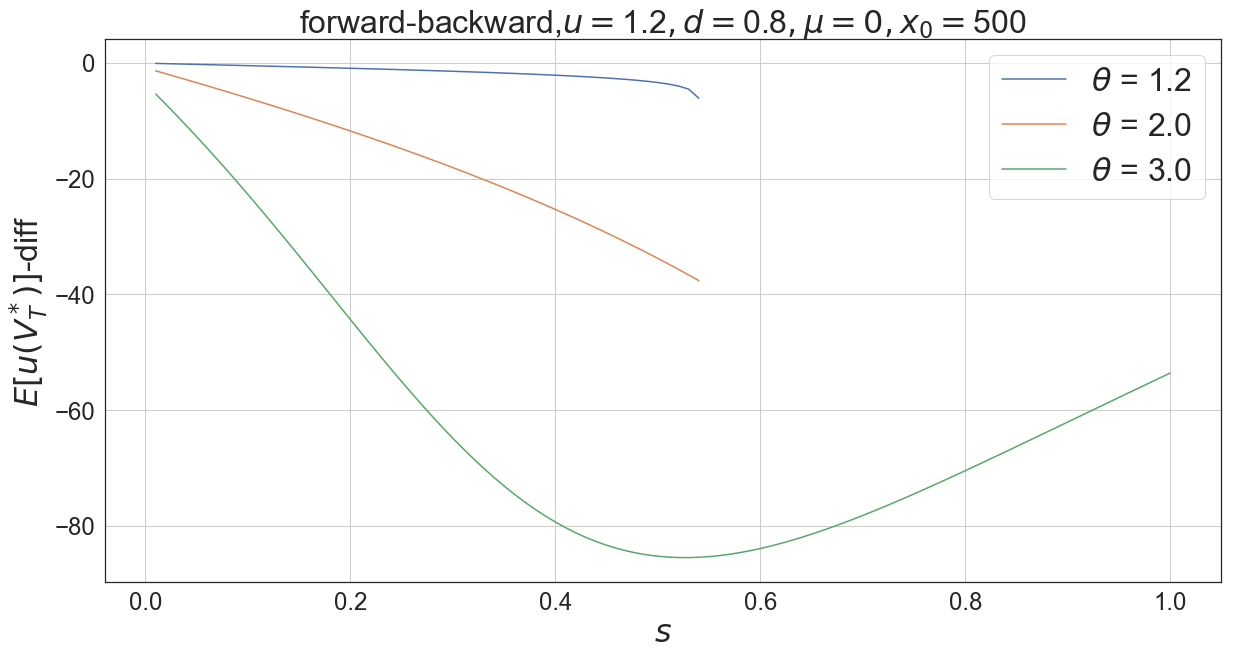

In [39]:
default_plot_normal_sigma(N, theta, u, d, p, default_value, mu, sigma)

### seed 2018

In [40]:
seed = 2018
N = 1
theta = 1.2
u = 1.2
d = 0.8
p = 0.4
default_value = 500
mu = 0
sigma=0.01

In [41]:
backward_normal_rand(N, theta, u, d, p, default_value, mu, sigma)

,up_times,down_times,prm_theta,up_r,down_r,prob,prm_M,value,wealth,utility,exp_utility,Wn
0,[0],[0],[1.2],[1.2],[0.8],[0.4],[1.004017865334002],[500.0],[16.971531130541546],[16.903614683087046],[16.903614683087046],[16.971531130541546]
1,"[1, 0]","[0, 1]","[1.2, 1.2]","[1.2046958592870476, 1.2122589190892132]","[0.8046958592870476, 0.8122589190892133]","[0.4, 0.4]","[1.003078128546356, 1.001554714699357]","[377.9037495876176, 611.9831251468075]","[16.132987001484146, 17.482672613254316]","[16.132987001484146, 17.482672613254316]","[6.453194800593659, 10.489603567952589]","[6.453194800593659, 10.489603567952589]"


In [42]:
forward_normal_rand(N, theta, u, d, p, default_value, mu, sigma)

,up_times,down_times,prm_theta,up_r,down_r,prob,prm_q,prm_a,prm_b,prm_c,delta,pi,value,U0,I0,I1,U1,exp_U1
0,[0],[0],[1.2],[1.2],[0.8],[0.4],[0.5],[1.4999999999999998],[1.0],[1.2],[0.9951997797372921],[-1.192952811430986],[500.0],[16.903614683087046],[177.47683298777858],[176.62490509790942],[16.835970022768272],[16.835970022768272]
1,"[1, 0]","[0, 1]","[1.2, 1.2]","[1.2046958592870476, 1.2122589190892132]","[0.8046958592870476, 0.8122589190892133]","[0.4, 0.4]","[0.4882603517823811, 0.4693527022769668]","[1.4311780027685488, 1.3267363396297025]","[1.0480876572294417, 1.1305938905831552]","[1.1724712011074196, 1.1306945358518812]","[0.9962503106315342, 0.9976718809370764]","[-1.0539658775477752, -0.8315590241194348]","[392.1287745180655, 578.0588950146508]","[16.23264791996052, 17.31729007810756]","[144.94077976121815, 200.28268594244906]","[144.39729686029037, 199.8164040033329]","[16.181909224459382, 17.283686293039167]","[6.472763689783753, 10.3702117758235]"


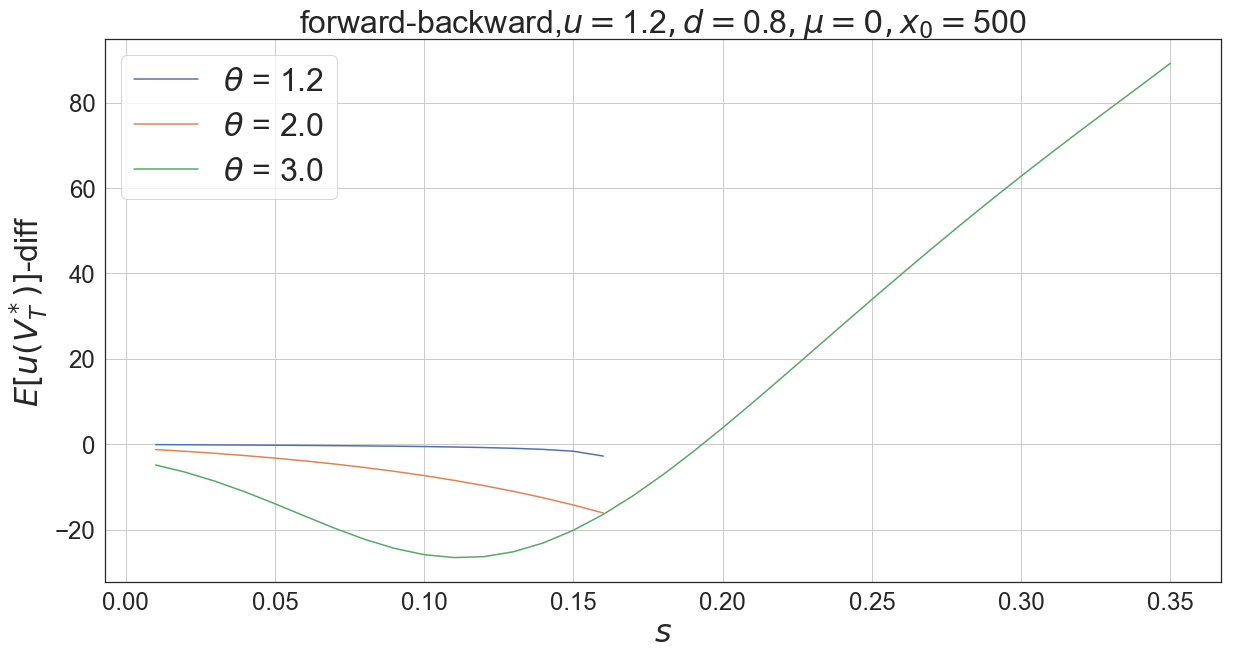

In [43]:
default_plot_normal_sigma(N, theta, u, d, p, default_value, mu, sigma)

In [52]:
sigma_arr = []
for i in range(1, 101):
        sigma_arr.append(0.01*i)
        #forward_backward_diff_theta_12 = [list(map(lambda x: x, sigma_arr)), list(map(lambda x: sum(forward_normal_rand(N, 1.2, u, d, p, default_value, mu, x)["exp_U1"][N]), sigma_arr))]
        forward_backward_diff_theta_12 = [list(map(lambda x: x, sigma_arr)), list(map(lambda x: sum(backward_normal_rand(N, 1.2, u, d, p, default_value, mu, x)["exp_utility"][N]), sigma_arr))]
diff_theta_12 = pd.DataFrame(forward_backward_diff_theta_12).T
diff_theta_12.columns = ["default", "Exp_diff"]

In [ ]:
 sum(backward_normal_rand(N, 1.2, u, d, p, default_value, mu, x)["exp_utility"][N])

### 誤差項を決め打ちで挙動確認

### $u+\epsilon, d-\epsilon$ 

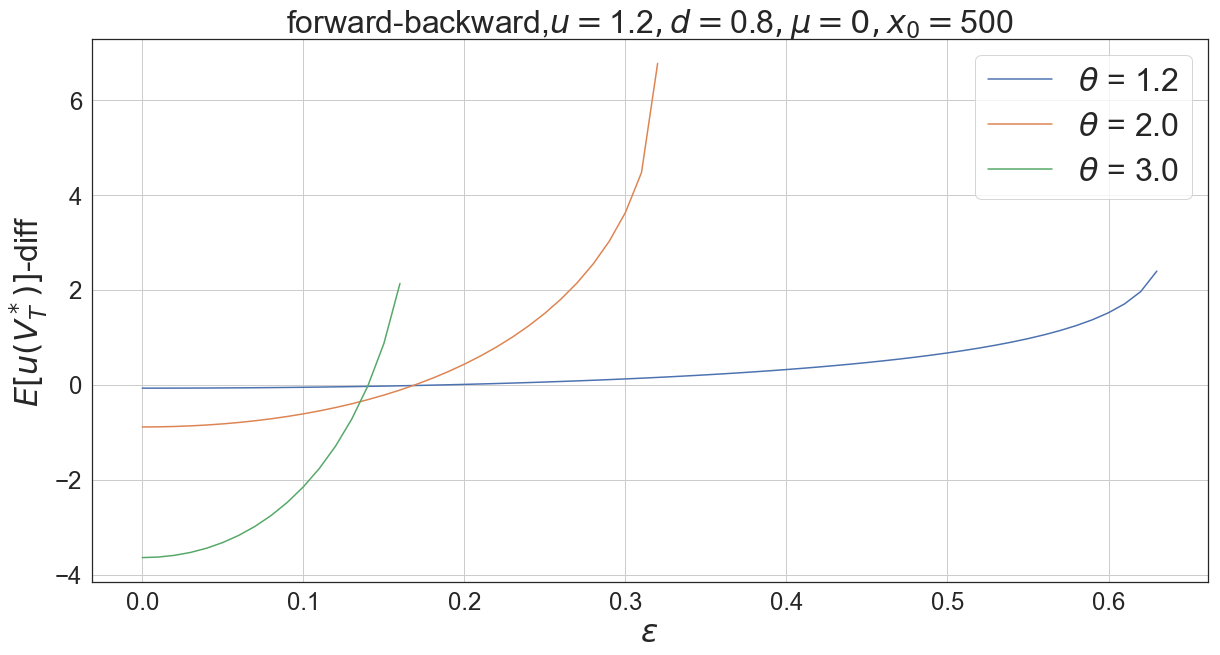

In [159]:
default_plot_normal_sigma_input(N, theta, u, d, p, default_value)

In [175]:
N = 1
theta = 3
u = 1.2
d = 0.8
p = 0.4
default_value = 500
up_eps = 0.2
down_eps = 0.2

In [178]:
backward_normal_rand_input(N, theta, u, d, p, default_value, up_eps, down_eps)

,up_times,down_times,prm_theta,up_r,down_r,prob,prm_M,value,wealth,utility,exp_utility,Wn
0,[0],[0],[3.0],[1.2],[0.8],[0.4],[1.0384988203702208],[500.0],[98.13198930565773],[94.49407874211552],[94.49407874211552],[98.13198930565773]
1,"[1, 0]","[0, 1]","[3.0, 3.0]","[1.4, 1.4]","[0.6000000000000001, 0.6000000000000001]","[0.4, 0.4]","[nan, nan]","[-42.857142857142705, 1042.8571428571427]","[nan, 154.25567095794472]","[nan, 154.25567095794472]","[nan, 92.55340257476682]","[nan, 92.55340257476682]"


In [186]:
#pi
((((p*(u-1))/((1-p)*(1-d)))**theta)-1)/((u - 1)+(((p*(u-1))/((1-p)*(1-d)))**theta)*(1 - d))

-2.714285714285714

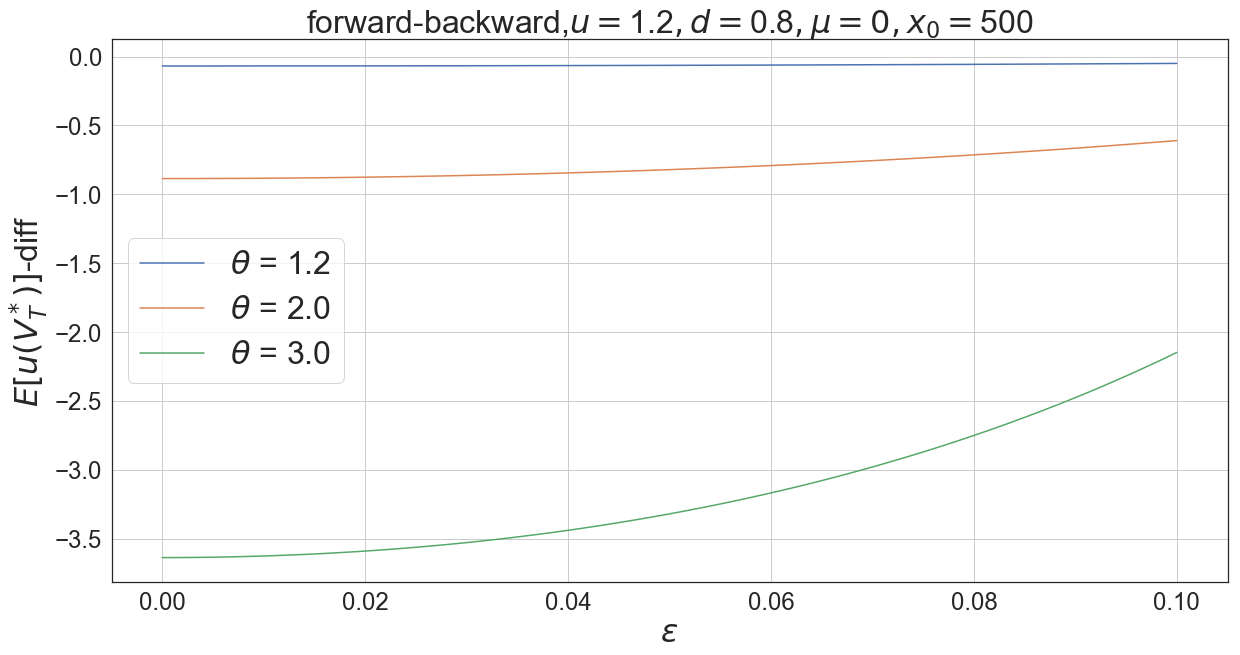

In [166]:
default_plot_normal_sigma_input(N, theta, u, d, p, default_value)

### $u+\epsilon, d+\epsilon$ 

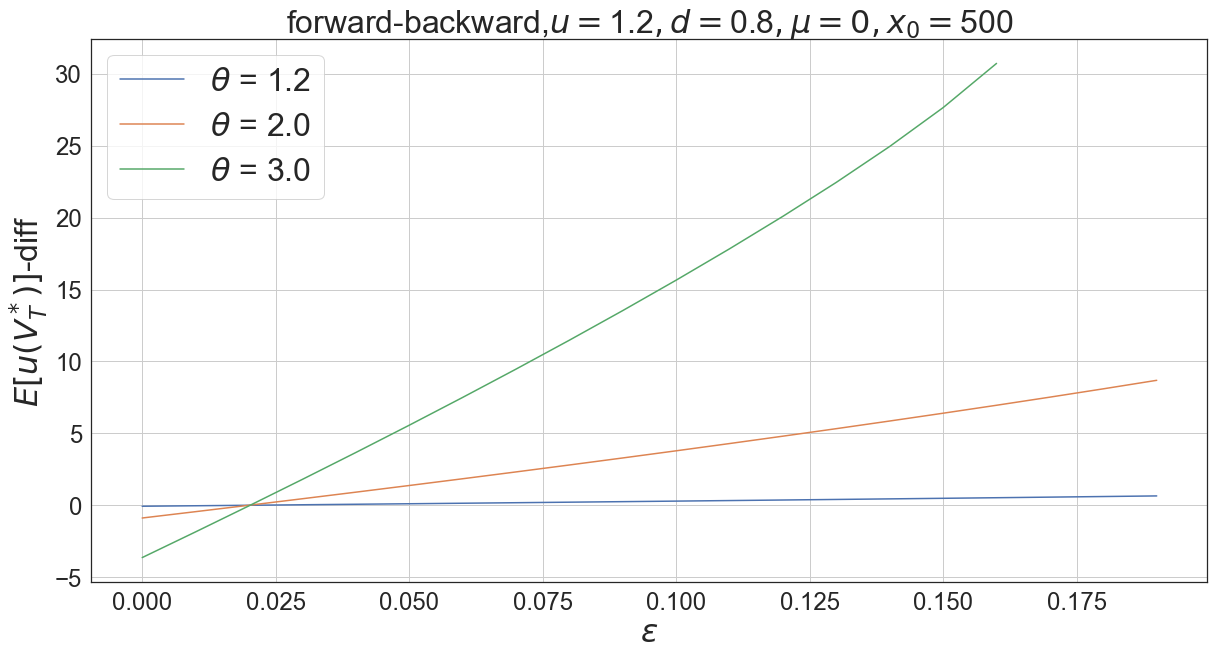

In [162]:
default_plot_normal_sigma_input(N, theta, u, d, p, default_value)